In [166]:
#Author: Sanger Steel

In [167]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation
from matplotlib.patches import Circle
import ffmpeg
box_length = 4

In [168]:
plt.rcParams['animation.ffmpeg_path'] = 'd://program//ffmpeg//bin//ffmpeg.exe'

In [169]:
class wildBox:

    def __init__(self, box_length = 1, pts = 100, max_speed = 1, dt = 1/1000):
        
        self.dt = dt
        self.pts = pts
        self.max_speed = max_speed
        self.box_pts = self.create_container(box_length)
        self.spawn_pts = self.spawn_point(box_length,pts)
        self.velocities = self.assign_velocities(pts)
        self.elapsed_time = 0

    def create_container(self,length):
        pts = np.linspace(0,length) 

        side1 = zip(pts,np.full((1,len(pts)),4)[0])
        side1 = tuple(side1)

        side2 = zip(pts,np.full((1,len(pts)),0)[0])
        side2 = tuple(side2)

        side3 = zip(np.full((1,len(pts)),4)[0],pts)
        side3 = tuple(side3)

        side4 = zip(np.full((1,len(pts)),0)[0],pts)
        side4 = tuple(side4)

        toflatten = (side1,side2,side3,side4)


        return list(sum(toflatten, ()))
    
    def assign_velocities(self, points):
        max_speed = self.max_speed
        pts = []
        for i in range(points):
            pts.append((np.random.uniform(-1*max_speed,max_speed),np.random.uniform(-1*max_speed,max_speed)))
        return pts            

    def simulate(self, spawn_pts, velocities, frames, dt):
        pts = self.pts
        dt = self.dt
        velocities = np.array(velocities)
        #print('velocities = ',velocities)
        positions = np.zeros((frames,pts,2))
        spawns = np.array(self.spawn_pts)
        #print('initial spawn: ',spawns)
        #print('pos : ', positions[0])
        positions[0] = spawns
        #print('initial positions : ', positions)
        #print('Initial position (to check): ',positions[0])
        for i in np.arange(1,frames):
            self.elapsed_time += dt
            for j in np.arange(1,pts+1):
                if ((positions[i-1][j-1][0] >= 4-0.1*dt) or (positions[i-1][j-1][0] <= 0+0.1*dt)):
                    velocities[j-1][0] = -1*velocities[j-1][0]
                    
                if ((positions[i-1][j-1][1] >= 4-0.1*dt) or (positions[i-1][j-1][1] <= 0+0.1*dt)):
                    velocities[j-1][1] = -1*velocities[j-1][1]
                    
                #print('j = ',j)
                #print('sol : ',positions[i][j][0])
                #print('term 1 : ',positions[i-1][j-1][0])
                #print('term 2 : ', velocities[j][0] * i)
                positions[i][j-1][0] = positions[i-1][j-1][0] + velocities[j-1][0] * dt 
                positions[i][j-1][1] = positions[i-1][j-1][1] + velocities[j-1][1] * dt 
                

        #print('positions : ',positions[:,0:100])
        return positions # FOR NOW

    def spawn_point(self,length,points):
        pts = []
        for i in range(points):
            pts.append((np.random.uniform(0.1,3.9),np.random.uniform(0.1,3.9)))
        return pts


In [170]:
dt = 1/10
pts = 100
Free = wildBox(box_length = 4, pts = pts, dt = dt)

In [171]:
thing=Free.simulate(Free.spawn_pts,Free.velocities,frames=3000, dt = 1/1000)


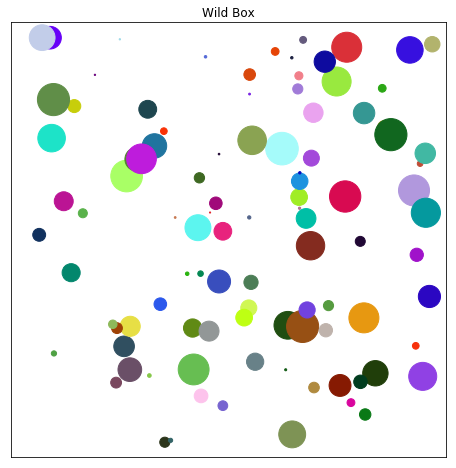

In [172]:


# In[5]:


fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, aspect='equal', autoscale_on=False,
                     xlim=(0, box_length), ylim=(0, box_length))
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Wild Box')

line, = ax.plot([],[], lw = 1)

colors=[]
radii=[]

for j in range(pts):
    colors.append(np.random.rand(3,))
    radii.append(np.random.uniform(0.005,0.15))

def init():
    line.set_data([],[])
    return line, 

def animate(i):
    pos_list = []
    objs = []

    ax.patches = [] # Redraw patch
    pos = Free.simulate(Free.spawn_pts,Free.velocities,frames=3000, dt = 1/1000)
    
    time_txt.set_text('Time : %.2f s' % Free.elapsed_time)
    for j in range(pts):
        colors.append(np.random.rand(3,))
        radii.append(np.random.uniform(0.005,0.15))
    for k in range(pts):
        pos_list = pos[:,k]
        obj = plt.Circle(tuple(pos_list[i]),radii[k],color=colors[k])
        ax.add_patch(obj)
    return line, time_txt,
    

# Find optimal interval for animation by basing it on how long the animate function takes to run
from time import time
t0 = time()
animate(0)
t1 = time()
interval = 1000 * dt - (t1 - t0)
    
anim = animation.FuncAnimation(fig,animate,init_func = init, frames = 300, blit = True, interval = interval)



In [ ]:
anim.save('wildBox.gif', writer = 'imagemagick',fps=30,extra_args=['-vcodec', 'libx264'])


plt.show()

MovieWriter imagemagick unavailable. Trying to use pillow instead.
